In [1]:
#This script opens the citation dataset and perform calculations in patent level
#Renato Kogeyama

#Miami, Jan 28, 2020
#Script to calculate citations received by a patent
#citation_id with less than 3 characters have no meaning
#they are causing problems moving forward
#so here I drop them


In [2]:
import pandas as pd
import numpy as np
import re

import sys
sys.path.append('/home/rkogeyam/scripts/')
from sampler import sampler

import gzip


In [3]:
%matplotlib inline

In [4]:
src = r'/home/rkogeyam/PATENT_CITATION/data/cleanuspatentcitation.csv.gz'
dst = '/home/rkogeyam/PATENT_CITATION/data/cit_received.csv.gz'

In [5]:
%%time
file_citation=gzip.open(src, 'r')
df=pd.read_csv(file_citation, usecols=['patent_id','citation_id','date'], dtype=object)

# sample_size=100
# df=sampler(fname, sample_size, sep='\t')

CPU times: user 4min 4s, sys: 10.8 s, total: 4min 14s
Wall time: 4min 15s


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108913836 entries, 0 to 108913835
Data columns (total 3 columns):
patent_id      object
citation_id    object
date           object
dtypes: object(3)
memory usage: 2.4+ GB


In [7]:
df.head()

,patent_id,citation_id,date
0,5354551,4875247,1989-10-01
1,D674253,D519335,2006-04-01
2,D809697,1963218,1934-06-01
3,D808172,7207426,2007-04-01
4,8683318,6642945,2003-11-01


In [8]:
%%time
#cited patents registers total citations received 

df=df.groupby(['citation_id']).count().iloc[:,0].reset_index() #Series, patent-level
# cited_patents.dropna(0, inplace=True) #Series, '0' implies that rows are dropped

#I should check this, because later I make citation back as index for merging purposes
# cited_patents=cited_patents.reset_index() #Dataframe

CPU times: user 1min 18s, sys: 1.06 s, total: 1min 19s
Wall time: 1min 19s


In [9]:
df.rename(columns={'patent_id': 'cit_received'}, inplace=True)

In [10]:
df.head()

,citation_id,cit_received
0,0,1
1,0000000,1
2,000004,1
3,000006,1
4,0000482,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635409 entries, 0 to 7635408
Data columns (total 2 columns):
citation_id     object
cit_received    int64
dtypes: int64(1), object(1)
memory usage: 116.5+ MB


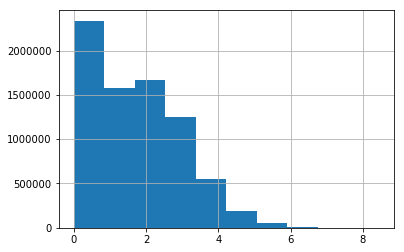

In [12]:
np.log(df['cit_received']).hist()

In [13]:
df['citation_id'].str.len().value_counts().sort_index()

1           7
2          25
3         212
4        2484
5       17595
6      259092
7     7232379
8       45734
9        1202
10         23
11      76616
12         38
13          1
15          1
Name: citation_id, dtype: int64

In [14]:
df=df[
df['citation_id'].apply(lambda x: len(x)>4)
  ]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632681 entries, 1 to 7635408
Data columns (total 2 columns):
citation_id     object
cit_received    int64
dtypes: int64(1), object(1)
memory usage: 174.7+ MB


In [16]:
%%time
df.dropna().to_csv(dst, compression='gzip')

CPU times: user 1min 3s, sys: 287 ms, total: 1min 4s
Wall time: 1min 4s
